## 분산투자



분산투자 개념은 한번 쯤은 들어보았을 것입니다.  
가장 큰 수익을 올릴 수 있는 종목을 알아낼 수 있으면 좋겠지만, 주가를 예측하는 것은 불가능하기 때문에  
그것에 대한 대안으로 다양한 주식에 투자하는 것이 바로 분산투자입니다.  
분산 투자하면 다수 종목의 평균적인 수익과 손실을 추구할 수 있게 됩니다.

In [21]:
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [22]:
# 데이터 가져오기

samsung = fdr.DataReader("005930", "2017", "2022-6-10")
kakao = fdr.DataReader("035720", "2017", "2022-6-10")
sk = fdr.DataReader("000660", "2017", "2022-6-10")
naver = fdr.DataReader("035420", "2017", "2022-6-10")
hyundai = fdr.DataReader("005380", "2017", "2022-6-10")
print(samsung.head())
print(kakao.head())
print(sk.head())
print(naver.head())
print(hyundai.head())

             Open   High    Low  Close  Volume    Change
Date                                                    
2017-01-02  35980  36240  35880  36100   93012  0.001665
2017-01-03  36280  36620  36020  36480  147153  0.010526
2017-01-04  36500  36520  36100  36160  159435 -0.008772
2017-01-05  36060  36060  35540  35560  219349 -0.016593
2017-01-06  36180  36440  36040  36200  177619  0.017998
             Open   High    Low  Close   Volume    Change
Date                                                     
2017-01-02  15534  15574  15373  15394   143140 -0.003947
2017-01-03  15495  16057  15454  16057   445180  0.043069
2017-01-04  16137  17080  16117  16920  1224395  0.053746
2017-01-05  17060  17261  16860  16860   611713 -0.003546
2017-01-06  16940  16960  16498  16800   410880 -0.003559
             Open   High    Low  Close   Volume    Change
Date                                                     
2017-01-02  44750  46000  44600  45800  1547681  0.024609
2017-01-03  46200  47

In [23]:
# 결측치 검사, 데이터에 결측치는 없다. 바로 사용해도 무방할듯
print(pd.isnull(samsung).sum())
print(pd.isnull(kakao).sum())
print(pd.isnull(sk).sum())
print(pd.isnull(naver).sum())
print(pd.isnull(hyundai).sum())


Open      0
High      0
Low       0
Close     0
Volume    0
Change    0
dtype: int64
Open      0
High      0
Low       0
Close     0
Volume    0
Change    0
dtype: int64
Open      0
High      0
Low       0
Close     0
Volume    0
Change    0
dtype: int64
Open      0
High      0
Low       0
Close     0
Volume    0
Change    0
dtype: int64
Open      0
High      0
Low       0
Close     0
Volume    0
Change    0
dtype: int64


**삼성전자 단일 종목 투자성과**

In [24]:
# 삼성전자 단일 종목 수익률
samsungDayReturn = (samsung['Close'] / samsung['Close'].shift(1)).fillna(1)
samsungDayReturn

Date
2017-01-02    1.000000
2017-01-03    1.010526
2017-01-04    0.991228
2017-01-05    0.983407
2017-01-06    1.017998
                ...   
2022-06-03    1.001499
2022-06-07    0.980539
2022-06-08    0.996947
2022-06-09    0.998469
2022-06-10    0.978528
Name: Close, Length: 1336, dtype: float64

In [25]:
# 삼전 누적수익률
samsungCumulativeReturn = samsungDayReturn.cumprod()
samsungCumulativeReturn

Date
2017-01-02    1.000000
2017-01-03    1.010526
2017-01-04    1.001662
2017-01-05    0.985042
2017-01-06    1.002770
                ...   
2022-06-03    1.850416
2022-06-07    1.814404
2022-06-08    1.808864
2022-06-09    1.806094
2022-06-10    1.767313
Name: Close, Length: 1336, dtype: float64

In [26]:
# 누적수익률을 구하는 다른 방법
samsungCumulativeReturn = samsung['Close'] / samsung['Close'].iloc[0]
samsungCumulativeReturn

Date
2017-01-02    1.000000
2017-01-03    1.010526
2017-01-04    1.001662
2017-01-05    0.985042
2017-01-06    1.002770
                ...   
2022-06-03    1.850416
2022-06-07    1.814404
2022-06-08    1.808864
2022-06-09    1.806094
2022-06-10    1.767313
Name: Close, Length: 1336, dtype: float64

In [27]:
# cagr
samsungCagr = samsungCumulativeReturn.iloc[-1] ** (252/len(samsung))
# mdd
samsungDd = (samsungCumulativeReturn.cummax() - samsungCumulativeReturn) / samsungCumulativeReturn.cummax() * 100
samsungMdd = samsungDd.max()

print("cagr: ",samsungCagr)
print("mdd: ",samsungMdd)

cagr:  1.1133941861853396
mdd:  34.55085634393569


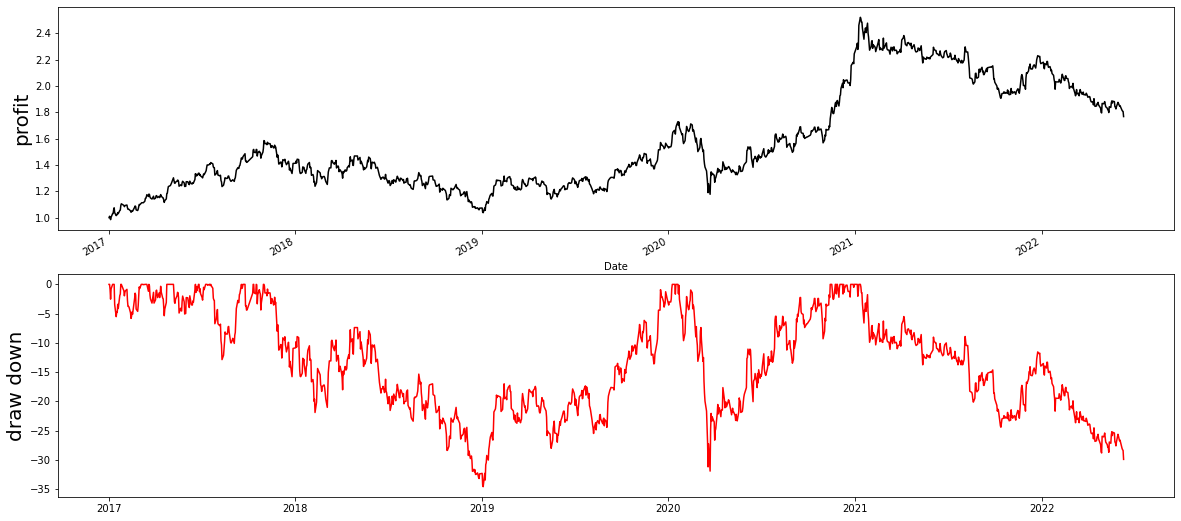

In [28]:
# 시각화
plt.figure(figsize=(20, 10))

# 수익곡선
plt.subplot(2, 1, 1)
samsungCumulativeReturn.plot(color="black")
plt.ylabel("profit", fontsize=20)

# 낙폭곡선
plt.subplot(2, 1, 2)
plt.plot(-samsungDd, color="red")
plt.ylabel("draw down", fontsize=20)
plt.show()

**5개 종목 분산 투자 성과와 누적 수익률 곡선**

5개 종목 종가를 하나의 데이터프레임으로 합치기

In [29]:
stocks = [samsung, kakao, sk, naver, hyundai]
data = pd.DataFrame()

for stock in stocks:
    data = pd.concat([data, stock['Close']], axis=1)
    
data.columns = ["samsung", "kakao", "sk", "naver", "hyundai"]

data

,samsung,kakao,sk,naver,hyundai
2017-01-02,36100,15394,45800,155620,150000
2017-01-03,36480,16057,47250,153617,153000
2017-01-04,36160,16920,46500,162230,154000
2017-01-05,35560,16860,46950,158424,153500
2017-01-06,36200,16800,48000,160026,151000
...,...,...,...,...,...
2022-06-03,66800,85700,107000,287500,187000
2022-06-07,65500,81900,104000,278000,183500
2022-06-08,65300,81500,106000,278000,183000
2022-06-09,65200,81300,105500,273000,182500


#### 다중 종목의 수익률을 계산하는 원리

https://sprinkle-guide-797.notion.site/4f7f60695edc4cebbfe568d442d0627a

## 누적수익률 계산

In [30]:
# 개별 자산 일별 수익률
dayReturn = (data / data.shift(1)).fillna(1)
dayReturn

,samsung,kakao,sk,naver,hyundai
2017-01-02,1.000000,1.000000,1.000000,1.000000,1.000000
2017-01-03,1.010526,1.043069,1.031659,0.987129,1.020000
2017-01-04,0.991228,1.053746,0.984127,1.056068,1.006536
2017-01-05,0.983407,0.996454,1.009677,0.976539,0.996753
2017-01-06,1.017998,0.996441,1.022364,1.010112,0.983713
...,...,...,...,...,...
2022-06-03,1.001499,1.023895,1.000000,0.991379,0.997333
2022-06-07,0.980539,0.955659,0.971963,0.966957,0.981283
2022-06-08,0.996947,0.995116,1.019231,1.000000,0.997275
2022-06-09,0.998469,0.997546,0.995283,0.982014,0.997268


In [31]:
# 개별 자산 누적 수익률
cumReturn = data / data.iloc[0]
cumReturn

,samsung,kakao,sk,naver,hyundai
2017-01-02,1.000000,1.000000,1.000000,1.000000,1.000000
2017-01-03,1.010526,1.043069,1.031659,0.987129,1.020000
2017-01-04,1.001662,1.099130,1.015284,1.042475,1.026667
2017-01-05,0.985042,1.095232,1.025109,1.018018,1.023333
2017-01-06,1.002770,1.091334,1.048035,1.028313,1.006667
...,...,...,...,...,...
2022-06-03,1.850416,5.567104,2.336245,1.847449,1.246667
2022-06-07,1.814404,5.320255,2.270742,1.786403,1.223333
2022-06-08,1.808864,5.294270,2.314410,1.786403,1.220000
2022-06-09,1.806094,5.281278,2.303493,1.754273,1.216667


In [32]:
# 포트폴리오 비율 : 동일 가중
portWeight = [1/len(data.columns)] * len(data.columns)
portWeight

[0.2, 0.2, 0.2, 0.2, 0.2]

In [33]:
# 누적 수익률
portCumReturn = (portWeight * cumReturn).sum(axis=1)
portCumReturn

2017-01-02    1.000000
2017-01-03    1.018477
2017-01-04    1.037043
2017-01-05    1.029347
2017-01-06    1.035424
                ...   
2022-06-03    2.569576
2022-06-07    2.483028
2022-06-08    2.484790
2022-06-09    2.472361
2022-06-10    2.439092
Length: 1336, dtype: float64

## 일간 수익률

### 간단한 방법 -> 역연산

In [34]:
portDayReturn = (portCumReturn / portCumReturn.shift(1)).fillna(1)
portDayReturn

2017-01-02    1.000000
2017-01-03    1.018477
2017-01-04    1.018230
2017-01-05    0.992578
2017-01-06    1.005904
                ...   
2022-06-03    1.008896
2022-06-07    0.966318
2022-06-08    1.000710
2022-06-09    0.994998
2022-06-10    0.986544
Length: 1336, dtype: float64

**분산투자 포트폴리오와 개별 종목 투자 결과 비교**

In [35]:
# 개별 자산 누적수익률
cumReturn

,samsung,kakao,sk,naver,hyundai
2017-01-02,1.000000,1.000000,1.000000,1.000000,1.000000
2017-01-03,1.010526,1.043069,1.031659,0.987129,1.020000
2017-01-04,1.001662,1.099130,1.015284,1.042475,1.026667
2017-01-05,0.985042,1.095232,1.025109,1.018018,1.023333
2017-01-06,1.002770,1.091334,1.048035,1.028313,1.006667
...,...,...,...,...,...
2022-06-03,1.850416,5.567104,2.336245,1.847449,1.246667
2022-06-07,1.814404,5.320255,2.270742,1.786403,1.223333
2022-06-08,1.808864,5.294270,2.314410,1.786403,1.220000
2022-06-09,1.806094,5.281278,2.303493,1.754273,1.216667


samsung
cagr: 1.1133941861853396
mdd: 34.55085634393569
kakao
cagr: 1.364919070102029
mdd: 52.743362831858406
sk
cagr: 1.1662363606042534
mdd: 39.45435466946485
naver
cagr: 1.109525056840862
mdd: 44.609719563951074
hyundai
cagr: 1.0398199600680809
mdd: 61.23529411764706
portfolio
cagr: 1.1831506456267813
mdd: 39.85001227920787


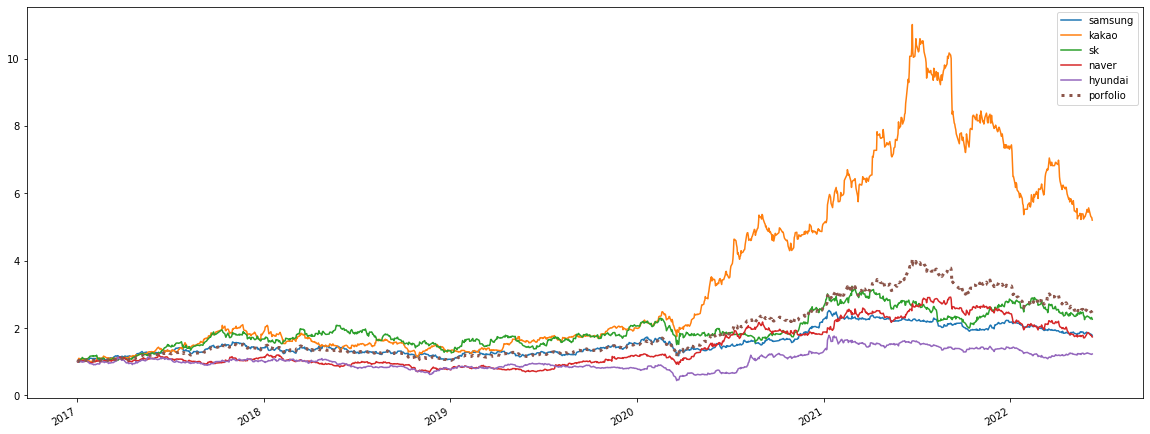

In [36]:
plt.figure(figsize=(20, 8))

for stock in cumReturn.columns:
    # 그래프
    cumReturn[stock].plot(label=stock)
    # cagr
    cagr = cumReturn[stock].iloc[-1] ** (252/len(cumReturn[stock]))
    # mdd
    dd = (cumReturn[stock].cummax() - cumReturn[stock]) / cumReturn[stock].cummax() * 100
    mdd= dd.max()
    
    print(stock)
    print(f"cagr: {cagr}\nmdd: {mdd}")
    print("=======")
    
    

# cagr
cagr = portCumReturn.iloc[-1] ** (252/len(portCumReturn))
# mdd
dd = (portCumReturn.cummax() - portCumReturn) / portCumReturn.cummax() * 100
mdd= dd.max()

print("portfolio")
print(f"cagr: {cagr}\nmdd: {mdd}")
print("=======")

portCumReturn.plot(label = "porfolio", linestyle="dotted", linewidth=3)
plt.legend()
plt.show()

### 안 간단한 방법 -> 비율 계산

In [37]:
# 자산별 비중이 반영된 자산 흐름
weightedCumReturn = portWeight * cumReturn
weightedCumReturn

,samsung,kakao,sk,naver,hyundai
2017-01-02,0.200000,0.200000,0.200000,0.200000,0.200000
2017-01-03,0.202105,0.208614,0.206332,0.197426,0.204000
2017-01-04,0.200332,0.219826,0.203057,0.208495,0.205333
2017-01-05,0.197008,0.219046,0.205022,0.203604,0.204667
2017-01-06,0.200554,0.218267,0.209607,0.205663,0.201333
...,...,...,...,...,...
2022-06-03,0.370083,1.113421,0.467249,0.369490,0.249333
2022-06-07,0.362881,1.064051,0.454148,0.357281,0.244667
2022-06-08,0.361773,1.058854,0.462882,0.357281,0.244000
2022-06-09,0.361219,1.056256,0.460699,0.350855,0.243333


In [38]:
# 자산 비율 => 자산 흐름 정규화 
assetRatio = weightedCumReturn.divide(weightedCumReturn.sum(axis=1), axis=0)
assetRatio

,samsung,kakao,sk,naver,hyundai
2017-01-02,0.200000,0.200000,0.200000,0.200000,0.200000
2017-01-03,0.198439,0.204829,0.202589,0.193844,0.200299
2017-01-04,0.193176,0.211974,0.195804,0.201048,0.197999
2017-01-05,0.191392,0.212801,0.199177,0.197799,0.198832
2017-01-06,0.193693,0.210800,0.202436,0.198626,0.194445
...,...,...,...,...,...
2022-06-03,0.144025,0.433309,0.181839,0.143794,0.097033
2022-06-07,0.146145,0.428530,0.182901,0.143889,0.098536
2022-06-08,0.145595,0.426134,0.186286,0.143787,0.098197
2022-06-09,0.146103,0.427225,0.186340,0.141911,0.098421


In [39]:
# 포트폴리오 개별자산 순 수익률
assetRatio * dayReturn.shift(-1)

,samsung,kakao,sk,naver,hyundai
2017-01-02,0.202105,0.208614,0.206332,0.197426,0.204000
2017-01-03,0.196698,0.215838,0.199373,0.204713,0.201608
2017-01-04,0.189971,0.211222,0.197698,0.196331,0.197356
2017-01-05,0.194836,0.212044,0.203631,0.199799,0.195593
2017-01-06,0.199150,0.208528,0.208973,0.193655,0.193801
...,...,...,...,...,...
2022-06-03,0.141222,0.414096,0.176741,0.139043,0.095217
2022-06-07,0.145698,0.426437,0.186418,0.143889,0.098267
2022-06-08,0.145372,0.425089,0.185408,0.141201,0.097929
2022-06-09,0.142966,0.420920,0.182807,0.140351,0.099500


In [40]:
# 포트폴리오 일간 수익률
portDayReturn2 = (assetRatio * dayReturn.shift(-1)).sum(axis=1).shift(1).fillna(1)
portDayReturn2

2017-01-02    1.000000
2017-01-03    1.018477
2017-01-04    1.018230
2017-01-05    0.992578
2017-01-06    1.005904
                ...   
2022-06-03    1.008896
2022-06-07    0.966318
2022-06-08    1.000710
2022-06-09    0.994998
2022-06-10    0.986544
Length: 1336, dtype: float64

In [41]:
# 포트폴리오 누적 수익률
portCumReturn2 = portDayReturn.cumprod()
portCumReturn2

2017-01-02    1.000000
2017-01-03    1.018477
2017-01-04    1.037043
2017-01-05    1.029347
2017-01-06    1.035424
                ...   
2022-06-03    2.569576
2022-06-07    2.483028
2022-06-08    2.484790
2022-06-09    2.472361
2022-06-10    2.439092
Length: 1336, dtype: float64

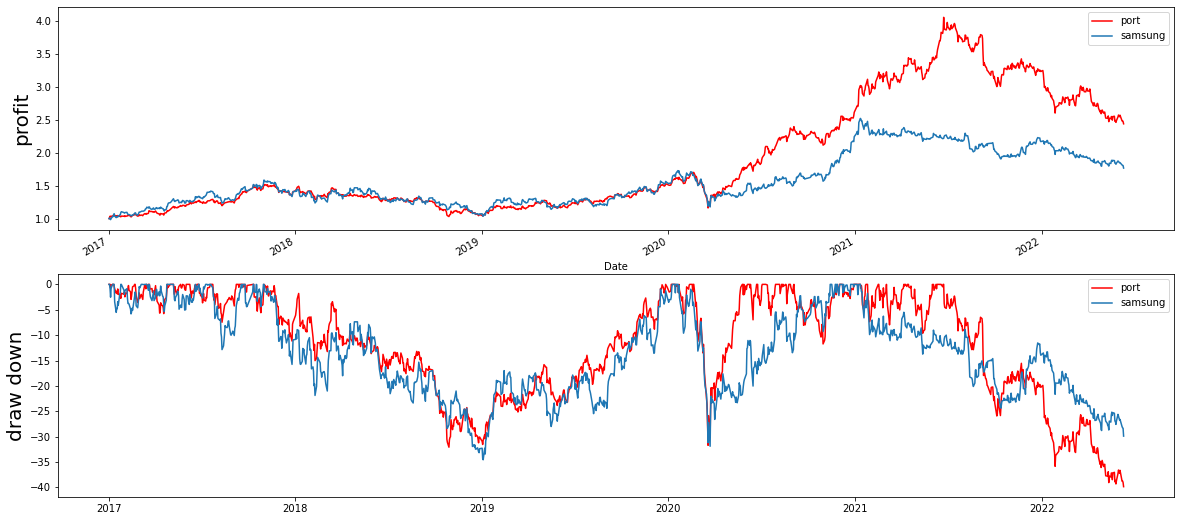

In [42]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 1, 1)
portCumReturn.plot(color="red", label="port")
samsungCumulativeReturn.plot(label="samsung")
plt.ylabel("profit", fontsize=20)
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(-dd, color="red", label="port")
plt.plot(-samsungDd, label="samsung")
plt.ylabel("draw down", fontsize=20)
plt.legend()
plt.show()